# Task M8 T01
## Grouping algorithm exercises.

#### - Exercise 1

Download the attached dataset, of records of Facebook posts about Thailand, and rank the different records using the K-means algorithm.

**Important**

Keep in mind that you will need to prepare the dataset beforehand.

In [12]:
import pandas as pd

df_post_Tailandia = pd.read_csv('Publicacions Facebook Thailandia.csv')
df_post_Tailandia.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [10]:
df_post_Tailandia.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
en primera instancia debemos eliminar las 4 ultimas columnas

In [15]:
df_post_Tailandia = df_post_Tailandia.iloc[:,:-4]
df_post_Tailandia.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Extract relevant columns
X = df_post_Tailandia[['num_reactions', 'num_comments', 'num_shares']].values

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [20]:
# Add cluster assignments to the original DataFrame
df_post_Tailandia['cluster'] = labels

# Sort the data based on cluster assignments
ranked_df = df_post_Tailandia.sort_values('cluster')


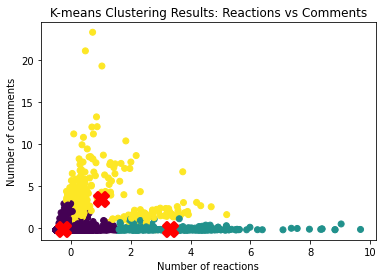

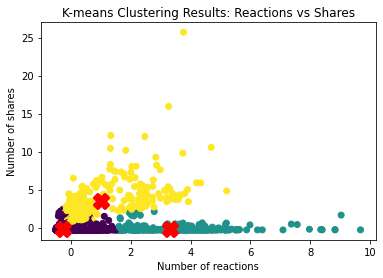

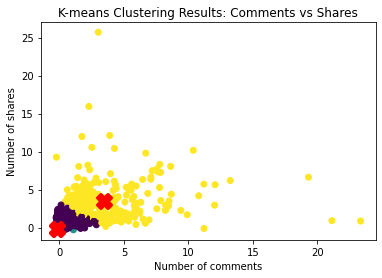

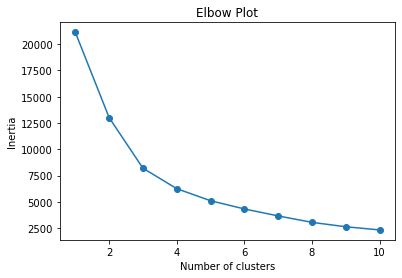

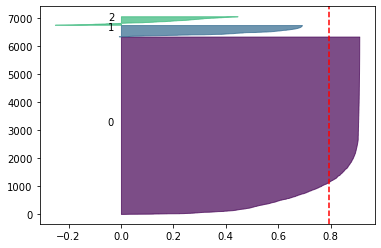

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the relevant columns
X = df_post_Tailandia[['num_reactions', 'num_comments', 'num_shares']]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Run K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Generate the 5 plots

# Plot 1: Reactions vs Comments
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, linewidths=3, color='r')
plt.xlabel('Number of reactions')
plt.ylabel('Number of comments')
plt.title('K-means Clustering Results: Reactions vs Comments')
plt.show()

# Plot 2: Reactions vs Shares
plt.scatter(X[:,0], X[:,2], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,2], marker='X', s=200, linewidths=3, color='r')
plt.xlabel('Number of reactions')
plt.ylabel('Number of shares')
plt.title('K-means Clustering Results: Reactions vs Shares')
plt.show()

# Plot 3: Comments vs Shares
plt.scatter(X[:,1], X[:,2], c=labels, cmap='viridis')
plt.scatter(centroids[:,1], centroids[:,2], marker='X', s=200, linewidths=3, color='r')
plt.xlabel('Number of comments')
plt.ylabel('Number of shares')
plt.title('K-means Clustering Results: Comments vs Shares')
plt.show()

# Plot 4: Elbow plot
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

# Plot 5: Silhouette plot
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap('viridis')(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color='red', linestyle='--')


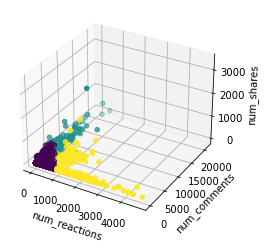

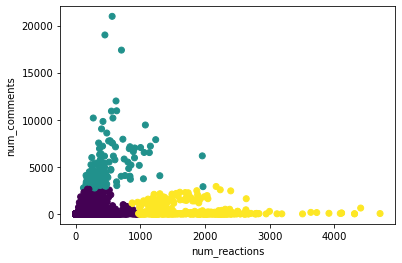

In [26]:
X = df_post_Tailandia[['num_reactions', 'num_comments', 'num_shares']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Generate scatter plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=kmeans.labels_)
ax.set_xlabel('num_reactions')
ax.set_ylabel('num_comments')
ax.set_zlabel('num_shares')
plt.show()

# Generate scatter plot with colors
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_)
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.show()

#### - Exercise 2
Sort the different records using the hierarchical clustering algorithm.

#### - Exercise 3
Calculate the clustering performance using a parameter such as silhouette. 